In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Setting the current working directory
import os; os.chdir('/content/drive/MyDrive/AI_ML/Projects/Capstone-NLP')

### Importing the Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import random

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report, confusion_matrix, roc_curve

## Load the dataset

In [4]:
#Function 1.1 - Load the dataset

def load_dataset(filename):
  data = pd.read_csv(filename)
  return data

#Function 1.2 - Dataset Cleansing

def data_cleansing_info(data):
  data.drop("Unnamed: 0", axis=1, inplace=True)
  data.rename(columns={'Data':'Date', 'Countries':'Country', 'Accident Level' : 'AccLevel' ,  'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)
  return data.head(5), data.isnull().sum()

data = load_dataset("IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")
data.head()

# Preparing the data for our model
# Done some preprocessing on the dataset to the 5 acc level:

# Data Cleansing
# Name Corrections
# Replace Roman numerals to Integers

data_cleansing_info(data)
data.head() #Column names corrected

,Date,Country,Local,Industry Sector,AccLevel,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,1/1/2016 0:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1/2/2016 0:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,1/6/2016 0:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,1/8/2016 0:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,1/10/2016 0:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


## Preparing the data for our model

Done some preprocessing on the dataset to the 5 acc level:
- Data Cleansing
- Name Corrections
- Replace Roman numerals to Integers

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      425 non-null    object
 1   Country                   425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   AccLevel                  425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Gender                    425 non-null    object
 7   Employee type             425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


In [6]:
data1 = data.copy() # Backup

In [7]:
data.columns

Index(['Date', 'Country', 'Local', 'Industry Sector', 'AccLevel',
       'Potential Accident Level', 'Gender', 'Employee type', 'Critical Risk',
       'Description'],
      dtype='object')

In [8]:
# NLP Import packages
import nltk; nltk.download('wordnet'); nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
import re
from string import punctuation
from wordcloud import STOPWORDS

stop_words =  stopwords.words('english')

def text_cleaning(text, remove_stop_words=True, lemmatize_words=True):
    # Clean the text, with the option to remove stop_words and to lemmatize word

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9]", " ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"I'm", "I am", text)
    text = re.sub(r"ur", " your ", text)
    text = re.sub(r" nd "," and ",text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r" tkts "," tickets ",text)
    text = re.sub(r" c "," can ",text)
    text = re.sub(r" e g ", " eg ", text)
    text =  re.sub(r'http\S+',' link ', text)
    text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text) # remove numbers
    text = re.sub(r" u "," you ",text)
    text = text.lower()  # set in lowercase 
        
    # Remove punctuation from text
    text = ''.join([c for c in text if c not in punctuation])
    
    # Optionally, remove stop words
    if remove_stop_words:
        text = text.split()
        text = [w for w in text if not w in stop_words]
        text = " ".join(text)
    
    # Optionally, shorten words to their stems
    if lemmatize_words:
        text = text.split()
        lemmatizer = WordNetLemmatizer() 
        lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
        text = " ".join(lemmatized_words)
    
    # Return a list of words
    return(text)

In [10]:
#clean the dataset 
data["clean_Description"] = data["Description"].apply(text_cleaning)
data.head(3)

,Date,Country,Local,Industry Sector,AccLevel,Potential Accident Level,Gender,Employee type,Critical Risk,Description,clean_Description
0,1/1/2016 0:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,removing drill rod jumbo maintenance superviso...
1,1/2/2016 0:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,ing activation sodium sulphide pump piping unc...
2,1/6/2016 0:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,sub station milpo located level collaborator e...


In [11]:
data.drop('Description', axis=1, inplace=True)
data.rename(columns={'clean_Description':'Description'}, inplace=True)
data.head()

,Date,Country,Local,Industry Sector,AccLevel,Potential Accident Level,Gender,Employee type,Critical Risk,Description
0,1/1/2016 0:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,removing drill rod jumbo maintenance superviso...
1,1/2/2016 0:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,ing activation sodium sulphide pump piping unc...
2,1/6/2016 0:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,sub station milpo located level collaborator e...
3,1/8/2016 0:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,approximately nv cx ob7 personnel begin task u...
4,1/10/2016 0:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,approximately circumstance mechanic anthony gr...


In [12]:
df = pd.DataFrame(data, columns=['AccLevel', 'Description'])
df.AccLevel = df.AccLevel.astype('category')
df_backup = df.copy()

In [13]:
df.head()

,AccLevel,Description
0,I,removing drill rod jumbo maintenance superviso...
1,I,ing activation sodium sulphide pump piping unc...
2,I,sub station milpo located level collaborator e...
3,I,approximately nv cx ob7 personnel begin task u...
4,IV,approximately circumstance mechanic anthony gr...


In [14]:
df.AccLevel.value_counts()

I      316
II      40
III     31
IV      30
V        8
Name: AccLevel, dtype: int64

In [ ]:
# df_upsampled_backup = df_upsampled.copy()
# df = df_upsampled.copy()

In [ ]:
# train_text = df_train['text'].tolist()
# train_text = np.array(train_text, dtype=object)[:, np.newaxis]

# train_label = np.asarray(pd.get_dummies(df_train.label), dtype = np.int8)

In [15]:
# split the data into train and test set
trainval, df_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [16]:
# Split train into train-val
df_train, val = train_test_split(trainval, test_size=0.1, random_state=21, shuffle=True)

In [17]:
from sklearn.utils import resample

In [18]:
df_train.AccLevel.value_counts()

I      223
II      29
III     25
IV      23
V        6
Name: AccLevel, dtype: int64

In [19]:
df_train_1 = df_train[df_train.AccLevel == "I"]
df_train_2 = df_train[df_train.AccLevel == "II"]
df_train_3 = df_train[df_train.AccLevel == "III"]
df_train_4 = df_train[df_train.AccLevel == "IV"]
df_train_5 = df_train[df_train.AccLevel == "V"]

In [20]:
df_train_2_upsampled = resample(df_train_2, replace = True, n_samples = 223 , random_state = 123)
df_train_3_upsampled = resample(df_train_3, replace = True, n_samples = 223 , random_state = 123)
df_train_4_upsampled = resample(df_train_4, replace = True, n_samples = 223 , random_state = 123)
df_train_5_upsampled = resample(df_train_5, replace = True, n_samples = 223 , random_state = 123)

In [21]:
df_train_upsampled = pd.concat([df_train_1, df_train_2_upsampled,df_train_3_upsampled, df_train_4_upsampled, df_train_5_upsampled ])
df_train_upsampled.AccLevel.value_counts()

V      223
IV     223
III    223
II     223
I      223
Name: AccLevel, dtype: int64

In [22]:
df_train_upsampled_bkup = df_train_upsampled.copy()
df_train_upsampled_bkup.AccLevel.value_counts()

V      223
IV     223
III    223
II     223
I      223
Name: AccLevel, dtype: int64

In [23]:
df_train = df_train_upsampled.copy()

In [ ]:
#train_label

In [24]:
%tensorflow_version 1.x

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import seaborn as sns
from tensorflow import keras
import keras.layers as layers
from keras.models import Model
from keras import backend as K

np.random.seed(10)

TensorFlow 1.x selected.


Using TensorFlow backend.


In [26]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/3" #@param ["https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]

In [27]:
# Import the Universal Sentence Encoder's TF Hub module
embed = hub.Module(module_url)

In [ ]:
# Compute a representation for each message, showing various lengths supported.
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

# Reduce logging output.
tf.logging.set_verbosity(tf.logging.ERROR)

with tf.Session() as session:
  session.run([tf.global_variables_initializer(), tf.tables_initializer()])
  message_embeddings = session.run(embed(messages))

  for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
    print("Message: {}".format(messages[i]))
    print("Embedding size: {}".format(len(message_embedding)))
    message_embedding_snippet = ", ".join(
        (str(x) for x in message_embedding[:3]))
    print("Embedding: [{}, ...]\n".format(message_embedding_snippet))
 

Message: Elephant
Embedding size: 512
Embedding: [0.044984739273786545, -0.057433947920799255, 0.0022114627063274384, ...]

Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: [0.055680159479379654, -0.00960791576653719, 0.006246302742511034, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [0.038749393075704575, 0.07652018219232559, -0.0007945768884383142, ...]



In [ ]:
# Compute a representation for each message, showing various lengths supported.
messages = ["That band rocks!", "That song is really cool."]

with tf.Session() as session:
  session.run([tf.global_variables_initializer(), tf.tables_initializer()])
  message_embeddings = session.run(embed(messages))
message_embeddings

array([[ 0.00341095, -0.03811169, -0.01249461, ..., -0.03188571,
         0.03693529, -0.04350928],
       [ 0.00599073, -0.03070363,  0.02946818, ..., -0.0187422 ,
         0.05244367,  0.01933835]], dtype=float32)

In [28]:
embed_size = embed.get_output_info_dict()['default'].get_shape()[1].value
embed_size

512

In [29]:
category_counts = len(df_train.AccLevel.cat.categories)
category_counts

5

In [30]:
train_text = df_train['Description'].tolist()
train_text = np.array(train_text, dtype=object)[:, np.newaxis]

train_label = np.asarray(pd.get_dummies(df_train.AccLevel), dtype = np.int8)
train_label[8]


array([1, 0, 0, 0, 0], dtype=int8)

In [31]:
train_text.shape

(1115, 1)

In [32]:
train_label.shape

(1115, 5)

In [33]:
train_label[:3]

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=int8)

In [34]:
test_text = df_test['Description'].tolist()
test_text = np.array(test_text, dtype=object)[:, np.newaxis]
test_label = np.asarray(pd.get_dummies(df_test.AccLevel), dtype = np.int8)
test_label[:3]

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]], dtype=int8)

In [35]:
val_text = val["Description"].tolist()
val_text = np.array(val_text, dtype=object)[:, np.newaxis]
val_label = np.asarray(pd.get_dummies(val.AccLevel), dtype = np.int8)
val_label[:3]

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0]], dtype=int8)

In [36]:
def UniversalEmbedding(x):
    return embed(tf.squeeze(tf.cast(x, tf.string)), signature="default", as_dict=True)["default"]

In [40]:
from keras.layers import Input, LSTM, Dense, Activation, Dropout,Embedding
from tensorflow.keras.layers import Flatten, Dense


In [41]:
!pip install keras-self-attention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.49.0-cp37-none-any.whl size=19468 sha256=ae806154011916a2882e0f64debd5a2f38f06973a754e1703ab8bafe00a14f3b
  Stored in directory: /root/.cache/pip/wheels/6f/9d/c5/26693a5092d9313daeae94db04818fc0a2b7a48ea381989f34
Successfully built keras-self-attention


In [58]:
#from keras_self_attention import SeqSelfAttention

https://stackoverflow.com/questions/60809068/error-output-of-the-tf-hub-layers-embedding-with-conv-or-rnn
https://stackoverflow.com/questions/42918446/how-to-add-an-attention-mechanism-in-keras?answertab=votes#tab-top


In [45]:
input_text = layers.Input(shape=(1,), dtype=tf.string)
print(input_text.shape)
embedding = layers.Lambda(UniversalEmbedding,output_shape=(embed_size,))(input_text)
print(embedding.shape)
reshape = layers.Reshape(target_shape=(1, 512 ))(embedding)
print(reshape.shape)
lstm=LSTM(units=128,return_sequences=False)(reshape)
#attn = SeqSelfAttention(attention_activation='softmax')(lstm)
attn = (Activation("softmax"))(lstm)
dense = layers.Dense(256, activation='relu')(attn)
print(dense.shape)

pred = layers.Dense(category_counts, activation='softmax')(dense)
model = Model(inputs=[input_text], outputs=pred)
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

(?, 1)
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


(?, 512)
(?, 1, 512)
(?, 256)


In [46]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1)                 0         
_________________________________________________________________
lambda_3 (Lambda)            (None, 512)               0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 1, 512)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               328192    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285

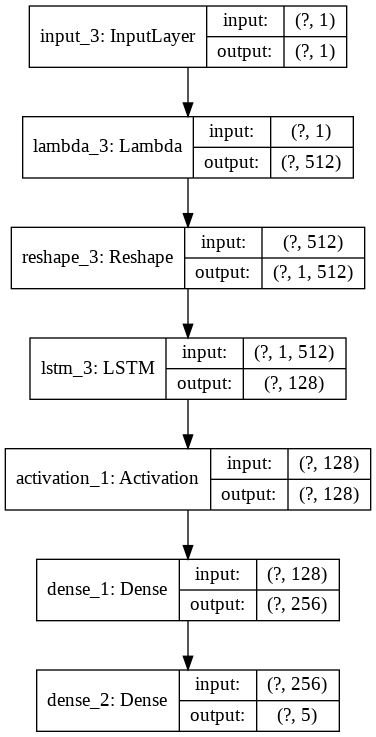

In [47]:
tf.keras.utils.plot_model(model, show_shapes = True)

In [ ]:
#from keras.callbacks import Callback
#https://github.com/keras-team/keras/issues/4962

In [48]:
with tf.Session() as session:
  K.set_session(session)
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  # Adding callbacks
  es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)  
  #mc = ModelCheckpoint('sarcasm_detector.h5', monitor = 'val_loss', mode = 'min', save_best_only = True, verbose = 1)
  #logdir = 'log'; tb = TensorBoard(logdir, histogram_freq = 1)
  #lr_r = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 5)
  
  callbacks = [es] #mc, lr_r] #https://stackoverflow.com/questions/58030543/list-of-keras-callbacks-generates-error-tuple-object-has-no-attribute-set-mo
  
  h = model.fit(train_text, train_label, validation_data=(test_text, test_label), epochs=30, batch_size=32, callbacks = callbacks)
  model.save_weights('./model.h5')

Train on 1115 samples, validate on 85 samples
Epoch 1/30
1115/1115 [==============================] - 47s 42ms/step - loss: 1.6107 - categorical_accuracy: 0.1848 - val_loss: 1.6045 - val_categorical_accuracy: 0.0706
Epoch 2/30
1115/1115 [==============================] - 45s 40ms/step - loss: 1.6100 - categorical_accuracy: 0.1865 - val_loss: 1.6213 - val_categorical_accuracy: 0.0471
Epoch 3/30
1115/1115 [==============================] - 44s 40ms/step - loss: 1.6099 - categorical_accuracy: 0.1901 - val_loss: 1.6081 - val_categorical_accuracy: 0.0706
Epoch 4/30
1115/1115 [==============================] - 44s 40ms/step - loss: 1.6094 - categorical_accuracy: 0.2036 - val_loss: 1.6013 - val_categorical_accuracy: 0.8000
Epoch 5/30
1115/1115 [==============================] - 45s 40ms/step - loss: 1.6089 - categorical_accuracy: 0.2152 - val_loss: 1.6054 - val_categorical_accuracy: 0.4706
Epoch 6/30
1115/1115 [==============================] - 44s 40ms/step - loss: 1.6080 - categorical_accur

In [ ]:
# print(type(callbacks))
# print(type(es))
# print(type(lr_r))
# print(type(mc))

<class 'list'>
<class 'tensorflow.python.keras.callbacks.EarlyStopping'>
<class 'tuple'>
<class 'tensorflow.python.keras.callbacks.ModelCheckpoint'>


In [ ]:
# from keras import metrics
# keras.metrics.categorical_accuracy(train_label, y_pred)

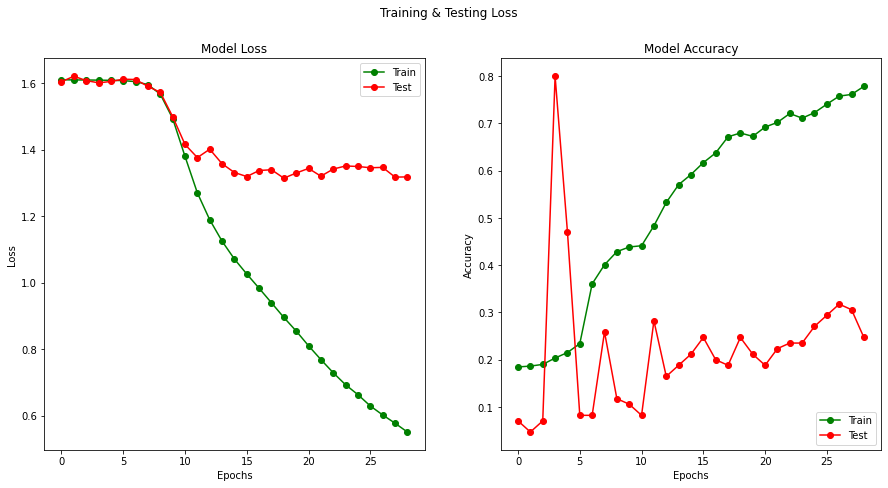

In [49]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))
f.suptitle('Training & Testing Loss')

ax1.plot(h.history['loss'], 'go-' , label = 'Train')
ax1.plot(h.history['val_loss'],  'ro-' , label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")

ax2.plot(h.history['categorical_accuracy'], 'go-', label = 'Train')
ax2.plot(h.history['val_categorical_accuracy'], 'ro-' , label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")

plt.show()

In [50]:
# Evaluate the model
with tf.Session() as session:
  K.set_session(session)
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  loss, categorical_accuracy = model.evaluate(val_text, val_label, verbose = 0)
  print('Overall Accuracy: {}'.format(categorical_accuracy * 100))
  #Predict using model
  y_pred = (model.predict(val_text) > 0.5).astype('int32')
  print(f'Classification Report:\n{classification_report(y_pred, val_label)}')

Overall Accuracy: 14.705882966518402
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0
 samples avg       0.00      0.00      0.00         0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMe

In [51]:
from sklearn import metrics

model_score = metrics.accuracy_score(val_label, y_pred)
print(model_score)

0.0


In [59]:
#new_text = ["In what year did the titanic sink ?", "What is the highest peak in California ?", "Who invented the light bulb ?"]
new_text = ["During field trip, to return to work after lunch, the employee of the Wellfield company slipped on the loose stones that were in the place. At that moment, with the intention of balancing, he tried hold onto a tree, falling under the right arm causing fracture at the distal end of the radius. The activity was paralyzed and the employee was referred to the Hospital in Paracatu where he underwent medical care.", "",""]
new_text = np.array(new_text, dtype=object)[:, np.newaxis]
with tf.Session() as session:
  K.set_session(session)
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  model.load_weights('./model.h5')  
  predicts = model.predict(new_text, batch_size=32)

In [60]:
predicts

array([[0.31835455, 0.1590203 , 0.06481834, 0.45727614, 0.00053075],
       [0.42836782, 0.26547793, 0.26774284, 0.03737545, 0.00103587],
       [0.42836782, 0.26547793, 0.26774284, 0.03737545, 0.00103587]],
      dtype=float32)

In [61]:
categories = df_train.AccLevel.cat.categories.tolist()
predict_logits = predicts.argmax(axis=1)
predict_labels = [categories[logit] for logit in predict_logits]
predict_labels

['IV', 'I', 'I']